# Palau

In [1]:
import sys
sys.path.append('/Applications/Stata/utilities/')
from pystata import config
config.init('be')


  ___  ____  ____  ____  ____ ®
 /__    /   ____/   /   ____/      17.0
___/   /   /___/   /   /___/       BE—Basic Edition

 Statistics and Data Science       Copyright 1985-2021 StataCorp LLC
                                   StataCorp
                                   4905 Lakeway Drive
                                   College Station, Texas 77845 USA
                                   800-STATA-PC        https://www.stata.com
                                   979-696-4600        stata@stata.com

Stata license: Unlimited-user, expiring  7 Feb 2024
Serial number: 401709311377
  Licensed to: Charlie Zhang
               Georgetown University

Notes:
      1. Unicode is supported; see help unicode_advice.


## VAR by PyStata

In [2]:
import os
os.chdir("../../")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
%%stata
ssc install schemepack, replace

checking schemepack consistency and verifying not already installed...
all files already exist and are up to date.


In [4]:
%%stata 
clear all 
global folder "/Users/czhang/Desktop/pacific-observatory" 

** Save the palau_merged as tempfile for merging
import delimited using "$folder/data/tourism/palau/intermediate/palau_merged.csv", 
generate time = m(2019m1) + _n-1 
format time %tm 
tempfile merged 
save `merged'

** Merge with the Covid Stringency Index
import delimited using "$folder/data/tourism/oceania_covid_stringency.csv", clear
merge 1:1 date using `merged'
keep if _merge == 2 | _merge == 3


. clear all 

. global folder "/Users/czhang/Desktop/pacific-observatory" 

. 
. ** Save the palau_merged as tempfile for merging
. import delimited using "$folder/data/tourism/palau/intermediate/palau_merged.
> csv", 
(encoding automatically selected: ISO-8859-1)
(16 vars, 45 obs)

. generate time = m(2019m1) + _n-1 

. format time %tm 

. tempfile merged 

. save `merged'
file /var/folders/kn/jw0y9v615mjgg3_51g3s73zh0000gn/T//St40322.000002 saved
    as .dta format

. 
. ** Merge with the Covid Stringency Index
. import delimited using "$folder/data/tourism/oceania_covid_stringency.csv", c
> lear
(encoding automatically selected: ISO-8859-1)
(5 vars, 38 obs)

. merge 1:1 date using `merged'

    Result                      Number of obs
    -----------------------------------------
    Not matched                            17
        from master                         5  (_merge==1)
        from using                         12  (_merge==2)

    Matched                            

In [5]:
%%stata
// Drop the _merge variables
drop _merge v1 
replace stringency_index = 0 if stringency_index == . 
tsset time 

// Generate Covid variable 
gen covid = . 
replace covid = 1 if date >= "2020m3"


. // Drop the _merge variables
. drop _merge v1 

. replace stringency_index = 0 if stringency_index == . 
(12 real changes made)

. tsset time 

Time variable: time, 2019m1 to 2022m9
        Delta: 1 month

. 
. // Generate Covid variable 
. gen covid = . 
(45 missing values generated)

. replace covid = 1 if date >= "2020m3"
(21 real changes made)

. 


In [6]:
%%stata
describe


Contains data
 Observations:            45                  
    Variables:            18                  
-------------------------------------------------------------------------------
Variable      Storage   Display    Value
    name         type    format    label      Variable label
-------------------------------------------------------------------------------
year            int     %8.0g                 
month           byte    %8.0g                 
stringency_in~x float   %9.0g                 
date            str10   %10s                  
seats_arriva~tl int     %8.0g                 Seats_arrivals_intl
seats_arriva~al int     %8.0g                 Seats_arrivals_total
number_of_fl~tl byte    %8.0g                 Number_of_flights_intl
number_of_fl~al byte    %8.0g                 Number_of_flights_total
japan           int     %8.0g                 JAPAN
southkorea      int     %8.0g                 SOUTH KOREA
taiwan          int     %8.0g                 TAIWAN
china 


. tsline (total seats_arrivals_intl), tline(2020m3) mcolor(%60) mlwidth(0) ///
> title("{bf}Visitors Arrivals from 2019 to 2022", pos(11) size(3)) ///
> xtitle("date") ytitle("Number") ///
> legend(off) ///
> scheme(white_tableau)

. 


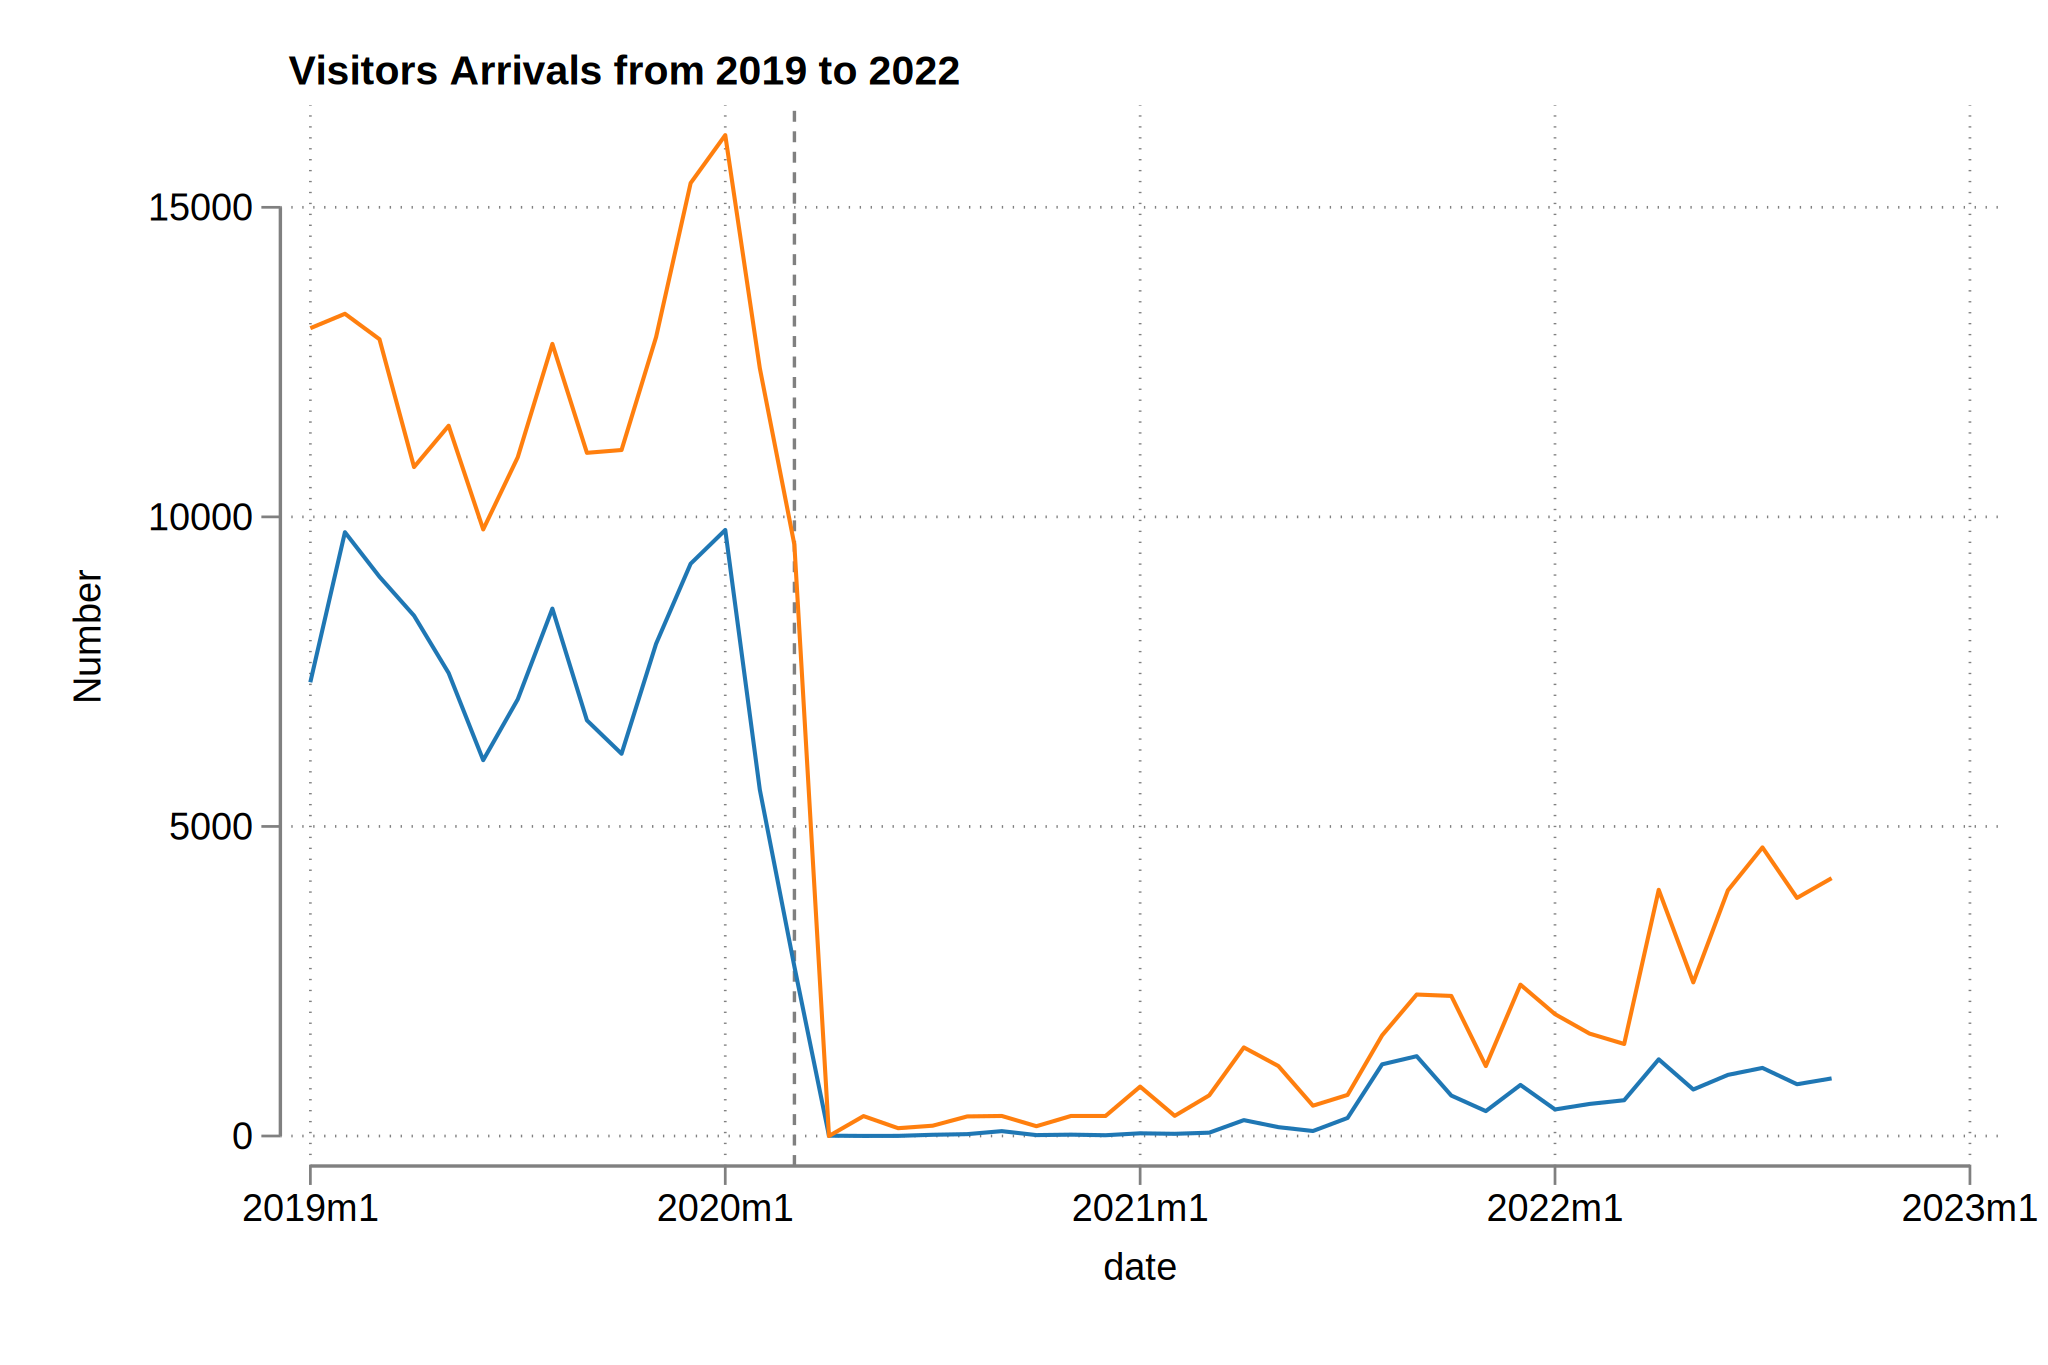

In [7]:
%%stata
tsline (total seats_arrivals_intl), tline(2020m3) mcolor(%60) mlwidth(0) ///
title("{bf}Visitors Arrivals from 2019 to 2022", pos(11) size(3)) ///
xtitle("date") ytitle("Number") ///
legend(off) ///
scheme(white_tableau)

In [8]:
%%stata
** employ dfuller to test stationarity
foreach x of varlist seats_arrivals_intl total{
	dfuller `x'
}


. ** employ dfuller to test stationarity
. foreach x of varlist seats_arrivals_intl total{
  2.         dfuller `x'
  3. }

Dickey–Fuller test for unit root           Number of obs  = 44
Variable: seats_arrival~tl                 Number of lags =  0

H0: Random walk without drift, d = 0

                                       Dickey–Fuller
                   Test      -------- critical value ---------
              statistic           1%           5%          10%
--------------------------------------------------------------
 Z(t)            -1.663       -3.621       -2.947       -2.607
--------------------------------------------------------------
MacKinnon approximate p-value for Z(t) = 0.4505.

Dickey–Fuller test for unit root           Number of obs  = 44
Variable: total                            Number of lags =  0

H0: Random walk without drift, d = 0

                                       Dickey–Fuller
                   Test      -------- critical value ---------
           

In [9]:
%%stata
** differencing variables
foreach x of varlist seats_arrivals_intl total {
	gen diff_`x' = d.`x'
}


. ** differencing variables
. foreach x of varlist seats_arrivals_intl total {
  2.         gen diff_`x' = d.`x'
  3. }
(1 missing value generated)
(1 missing value generated)

. 


In [10]:
%%stata
** Optimal lag selection
varsoc diff_seats_arrivals_intl diff_total, maxlag(8)


. ** Optimal lag selection
. varsoc diff_seats_arrivals_intl diff_total, maxlag(8)

Lag-order selection criteria

   Sample: 2019m10 thru 2022m9                              Number of obs = 36
  +---------------------------------------------------------------------------+
  | Lag |    LL      LR      df    p     FPE       AIC      HQIC      SBIC    |
  |-----+---------------------------------------------------------------------|
  |   0 | -606.756                     1.7e+12   33.8198   33.8505   33.9077  |
  |   1 | -598.411   16.69    4  0.002 1.3e+12   33.5784   33.6705   33.8423  |
  |   2 | -580.129  36.564    4  0.000 6.0e+11   32.7849   32.9385   33.2248* |
  |   3 | -578.735  2.7871    4  0.594 6.9e+11   32.9297   33.1447   33.5455  |
  |   4 | -570.287  16.897    4  0.002 5.5e+11   32.6826   32.9589   33.4744  |
  |   5 |  -559.86  20.853*   4  0.000 3.9e+11*  32.3256*  32.6633*  33.2933  |
  |   6 | -556.695  6.3304    4  0.176 4.2e+11   32.3719   32.7711   33.5156  |
  |   

In [11]:
%%stata
** Vector Autogressive Models
var diff_total diff_seats_arrivals_intl, exog(stringency_index covid) dfk small


. ** Vector Autogressive Models
. var diff_total diff_seats_arrivals_intl, exog(stringency_index covid) dfk sma
> ll
note: covid omitted because of collinearity.

Vector autoregression

Sample: 2021m1 thru 2022m9                      Number of obs     =         21
Log likelihood =  -304.5915                     AIC               =   30.15157
FPE            =   4.40e+10                     HQIC              =   30.28111
Det(Sigma_ml)  =   1.36e+10                     SBIC              =   30.74844

Equation           Parms      RMSE     R-sq        F       P > F
----------------------------------------------------------------
diff_total            6     276.536   0.5346    3.44637   0.0285
diff_seats_arr~l      6     742.976   0.5293   3.373297   0.0306
----------------------------------------------------------------

------------------------------------------------------------------------------
             | Coefficient  Std. err.      t    P>|t|     [95% conf. interval]
------------


. irf create var1, step(12) set($folder/scripts/notebooks/tourism/modelling/pal
> au_irf) replace
(file /Users/czhang/Desktop/pacific-observatory/scripts/notebooks/tourism/model
> ling/palau_irf.irf now active)
(file /Users/czhang/Desktop/pacific-observatory/scripts/notebooks/tourism/model
> ling/palau_irf.irf updated)

. irf graph oirf, ///
> impulse(diff_seats_arrivals_intl) response(diff_total) ///
> yline(0,lcolor(black)) xlabel(0(3)12) byopts(yrescale) ///
> scheme(white_tableau)

. 


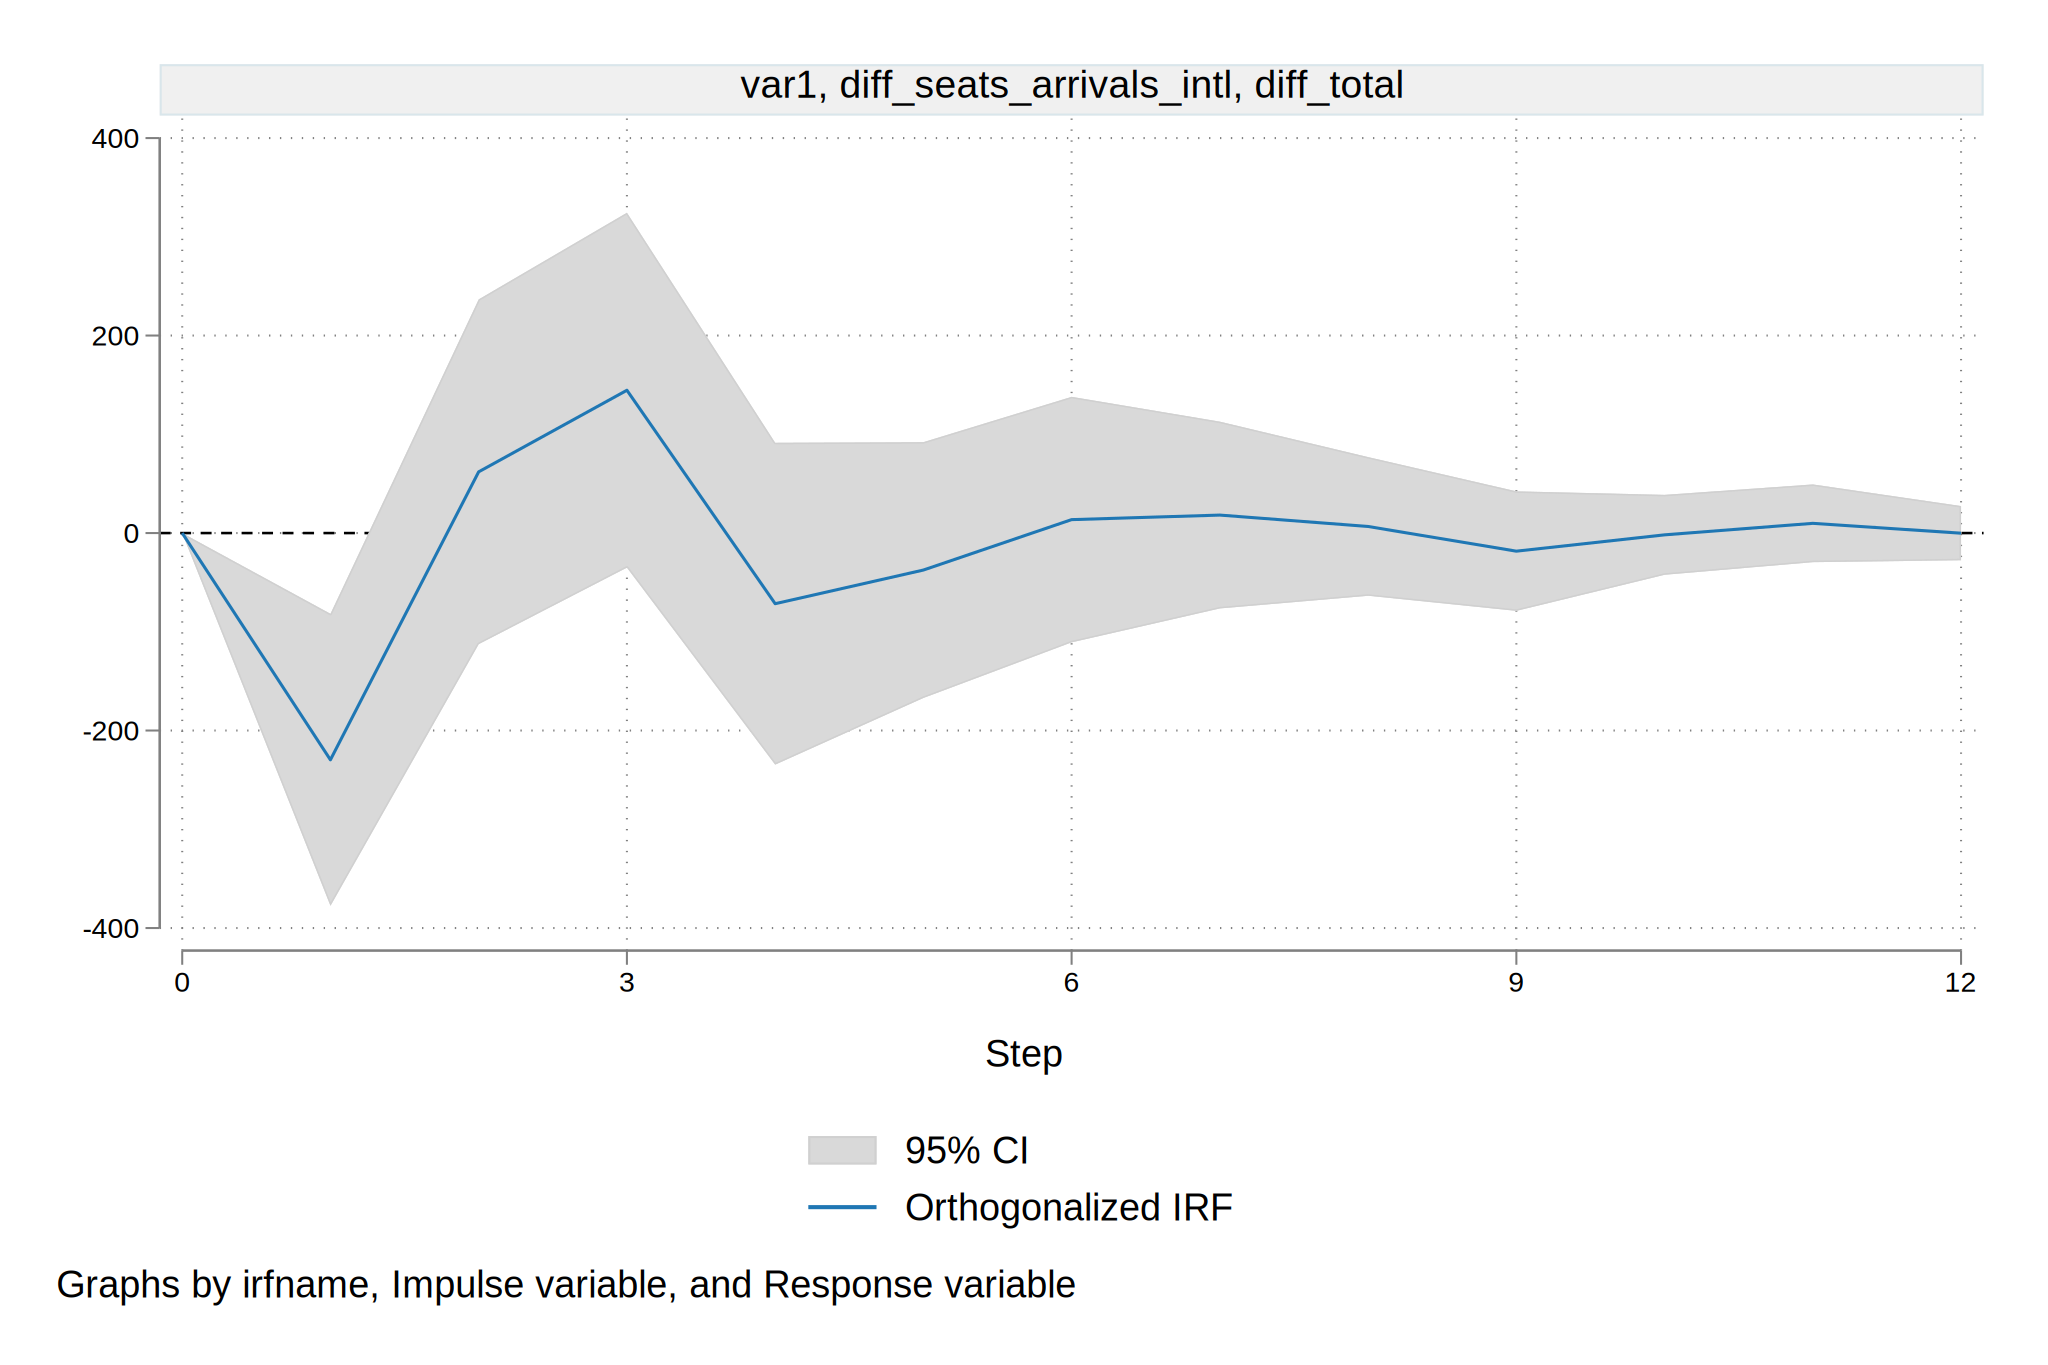

In [12]:
%%stata
irf create var1, step(12) set($folder/scripts/notebooks/tourism/modelling/palau_irf) replace
irf graph oirf, ///
impulse(diff_seats_arrivals_intl) response(diff_total) ///
yline(0,lcolor(black)) xlabel(0(3)12) byopts(yrescale) ///
scheme(white_tableau)

In [13]:
%%stata
** Robustness Check
varstable
predict error, residual


. ** Robustness Check
. varstable

   Eigenvalue stability condition
  +----------------------------------------+
  |        Eigenvalue        |   Modulus   |
  |--------------------------+-------------|
  |  .06269116 +  .7198751i  |     .7226   |
  |  .06269116 -  .7198751i  |     .7226   |
  |  -.4776104 +  .4730879i  |   .672253   |
  |  -.4776104 -  .4730879i  |   .672253   |
  +----------------------------------------+
   All the eigenvalues lie inside the unit circle.
   VAR satisfies stability condition.

. predict error, residual
(3 missing values generated)

. 



. tsline error, ///
> title("Residual Over Time", pos(11) size(3)) ///
> scheme(white_tableau)

. 


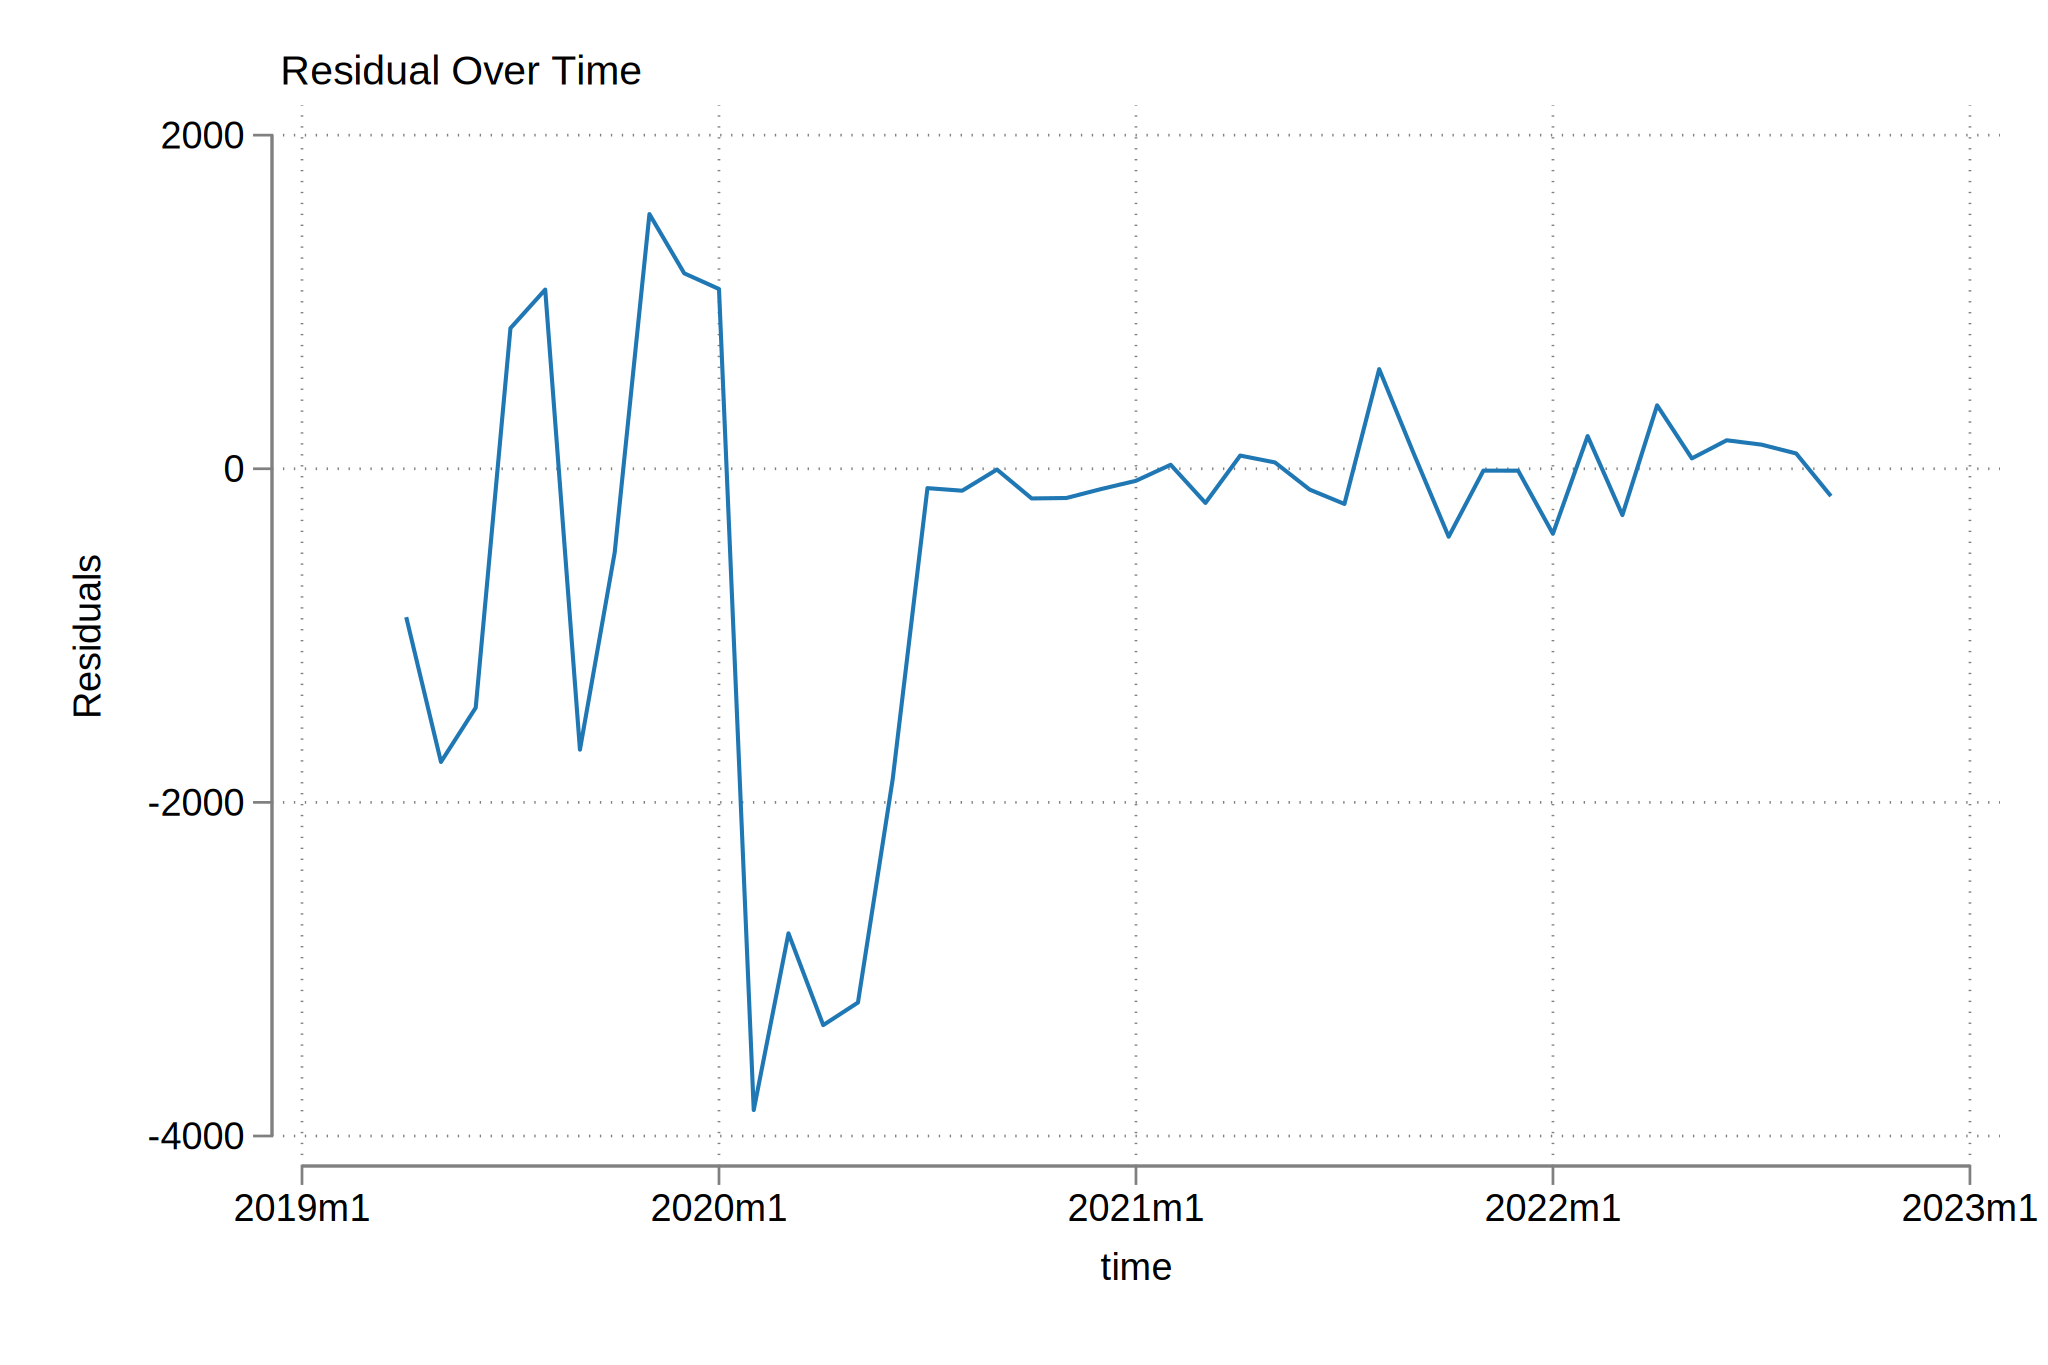

In [14]:
%%stata
tsline error, ///
title("Residual Over Time", pos(11) size(3)) ///
scheme(white_tableau)

In [15]:
%%stata
** check autocorrelation at lag
varlmar


. ** check autocorrelation at lag
. varlmar

   Lagrange-multiplier test
  +--------------------------------------+
  | lag  |      chi2    df   Prob > chi2 |
  |------+-------------------------------|
  |   1  |    9.6931     4     0.04593   |
  |   2  |    6.2212     4     0.18323   |
  +--------------------------------------+
   H0: no autocorrelation at lag order

. 


## Ratio

In [16]:
filedir = os.getcwd() + "/data/tourism/palau/intermediate/"
filepaths = [filedir + file for file in os.listdir(filedir) if ".csv" in file]
filepaths

['/Users/czhang/Desktop/pacific-observatory/data/tourism/palau/intermediate/palau_merged.csv',
 '/Users/czhang/Desktop/pacific-observatory/data/tourism/palau/intermediate/palau_monthly_visitor.csv']

In [19]:
oceania_index = (pd.read_csv(os.getcwd() + "/data/tourism/oceania_covid_stringency.csv")
                   .drop("Unnamed: 0", axis=1))
oceania_index["date"] = pd.to_datetime(oceania_index["date"])
oceania_index.head(5)

,year,month,stringency_index,date
0,2020,1,6.485000,2020-01-01
1,2020,2,18.961379,2020-02-01
2,2020,3,41.960753,2020-03-01
3,2020,4,82.458000,2020-04-01
4,2020,5,64.930000,2020-05-01


In [20]:
gt = pd.read_csv(
    os.getcwd() + "/data/tourism/trends/trends_palau.csv").drop("Unnamed: 0", axis=1)
gt["date"] = pd.to_datetime(gt["date"])
gt.head(5)

,date,palau flights-AU,palau hotel-AU,palau travel-AU,palau flights-NZ,palau hotel-NZ,palau travel-NZ,palau flights-US,palau hotel-US,palau travel-US,...,palau travel-JP,palau flights-HK,palau hotel-HK,palau travel-HK,palau flights-NC,palau hotel-NC,palau travel-NC,palau flights,palau hotel,palau travel
0,2004-01-01,0,0,0,0,0,0,0,23,0,...,0,0,0,0,0,0,0,0.0,3.155717,3.055298
1,2004-02-01,0,0,0,0,0,0,0,0,28,...,0,0,0,0,0,0,0,0.0,5.111154,2.142547
2,2004-03-01,0,63,0,0,0,0,0,0,0,...,0,0,90,0,0,0,0,0.0,6.132983,2.768303
3,2004-04-01,0,0,0,0,0,0,0,0,100,...,0,0,0,0,0,0,0,0.0,10.537711,0.000000
4,2004-05-01,0,0,0,0,0,0,22,0,0,...,0,0,0,0,0,0,0,0.0,7.344062,0.000000


In [23]:
palau_merged = pd.read_csv(filepaths[0]).drop(["Unnamed: 0", "Date"], axis=1)
palau_merged["date"] = [str(year) + '-' + str(month)
                        for year, month in zip(palau_merged.Year, palau_merged.Month)]
palau_merged["date"] = pd.to_datetime(palau_merged["date"])
palau_merged = (palau_merged.merge(oceania_index, how="left", on="date")
                .merge(gt.iloc[:, [0, -3, -2, -1]], how="left", on="date")
                .drop(["year", "month"], axis=1)
                .fillna(0))
palau_merged["covid"] = (palau_merged["date"] >= "2020-03-12").astype(int)
palau_merged.columns = [col.lower() for col in palau_merged.columns]
palau_merged.head(5)

,year,month,seats_arrivals_intl,seats_arrivals_total,number_of_flights_intl,number_of_flights_total,japan,south korea,taiwan,china,usa/canada,europe,others,total,date,stringency_index,palau flights,palau hotel,palau travel,covid
0,2019,1,13048.0,13048.0,75.0,75.0,1953.0,1169.0,919.0,2072.0,626.0,310.0,280.0,7329.0,2019-01-01,0.0,0.493228,2.559978,0.194222,0
1,2019,2,13281.0,13281.0,74.0,74.0,2055.0,1035.0,1092.0,4059.0,702.0,438.0,371.0,9752.0,2019-02-01,0.0,0.310671,2.841414,0.282245,0
2,2019,3,12870.0,12870.0,73.0,73.0,2434.0,1090.0,1190.0,2549.0,826.0,483.0,461.0,9033.0,2019-03-01,0.0,0.386389,2.921431,0.286529,0
3,2019,4,10806.0,10806.0,64.0,64.0,1756.0,808.0,1099.0,3182.0,777.0,368.0,415.0,8405.0,2019-04-01,0.0,0.293529,2.981907,0.338945,0
4,2019,5,11472.0,11472.0,67.0,67.0,1288.0,1095.0,1393.0,2489.0,607.0,185.0,421.0,7478.0,2019-05-01,0.0,0.306351,3.537987,0.168664,0


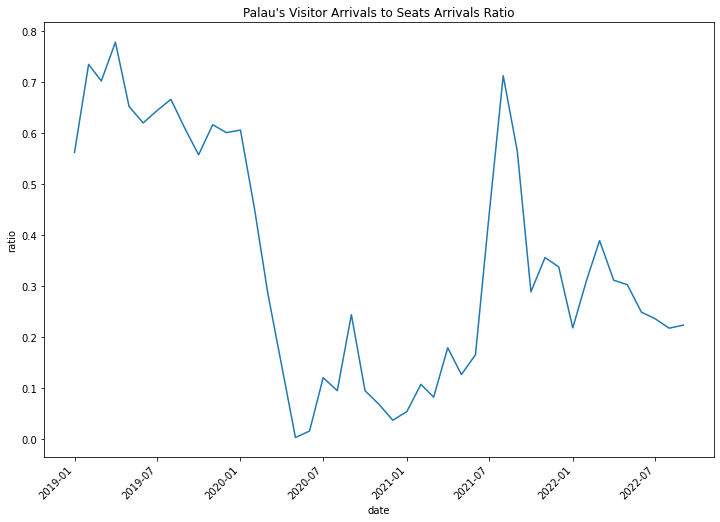

In [25]:
palau_merged["ratio"] = (palau_merged["total"])/(palau_merged["seats_arrivals_intl"])

import seaborn as sns
fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=palau_merged, x="date", y="ratio")
plt.xticks(rotation=45, ha='right')
plt.title("Palau's Visitor Arrivals to Seats Arrivals Ratio")
plt.show()

In [26]:
adj_ratio = []
for idx, ratio in enumerate(palau_merged["ratio"]):
    if ratio < 1:
        adj_ratio.append(ratio)
    else:
        ratio = ((palau_merged["ratio"][idx-1] + palau_merged["ratio"][idx+1]))/2
        adj_ratio.append(ratio)
        
palau_merged["adj_ratio"] = adj_ratio

In [27]:
from scripts.python.ts_utils import get_adf_df
get_adf_df(palau_merged, ["adj_ratio"])

,Test Statistic,p-value,# Lags Used,Number of Observations Used,Critical Value (1%),Critical Value (5%),Critical Value (10%)
adj_ratio,-2.259475,0.185371,1.0,43.0,-3.592504,-2.93155,-2.604066


In [28]:
temp = palau_merged[["ratio", "adj_ratio", "stringency_index", "date"]].reset_index()
temp["covid"] = (temp.date >= "2020-03-12")
temp["quarter"] = temp["date"].dt.quarter
temp = (temp.merge(gt[["date", "palau travel"]], how="left", on="date")
            .rename({"palau travel": "palau_travel"}, axis=1))
temp.head(5)

,index,ratio,adj_ratio,stringency_index,date,covid,quarter,palau_travel
0,0,0.561695,0.561695,0.0,2019-01-01,False,1,0.194222
1,1,0.734282,0.734282,0.0,2019-02-01,False,1,0.282245
2,2,0.701865,0.701865,0.0,2019-03-01,False,1,0.286529
3,3,0.777809,0.777809,0.0,2019-04-01,False,2,0.338945
4,4,0.651848,0.651848,0.0,2019-05-01,False,2,0.168664


In [29]:
import statsmodels.formula.api as smf
res = smf.wls(
    formula="adj_ratio ~ covid * stringency_index + C(quarter) + palau_travel", data=temp).fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            WLS Regression Results                            
==============================================================================
Dep. Variable:              adj_ratio   R-squared:                       0.762
Model:                            WLS   Adj. R-squared:                  0.717
Method:                 Least Squares   F-statistic:                     16.95
Date:                Tue, 18 Apr 2023   Prob (F-statistic):           8.36e-10
Time:                        16:31:20   Log-Likelihood:                 34.253
No. Observations:                  45   AIC:                            -52.51
Df Residuals:                      37   BIC:                            -38.05
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
Intercept                          0.4637      0.074      6.305      0.000       0.315       0.613
covid[T.True]                     -0.5484      0.105     -5.240      0.000      -0.760      -0.336
C(quarter)[T.2]                   -0.0496      0.055     -0.908      0.370      -0.160       0.061
C(quarter)[T.3]                    0.0487      0.056      0.865      0.392      -0.065       0.163
C(quarter)[T.4]                    0.0115      0.059      0.196      0.846      -0.107       0.130
stringency_index                  -0.0087      0.003     -2.855      0.007      -0.015      -0.003
covid[T.True]:stringency_index     0.0116      0.004      3.184      0.003       0.004       0.019
palau_travel                       0.5390      0.178      3.029      0.004       0.178       0.900
==============================================================================
Omnibus:                        6.243   Durbin-Watson:                   0.575
Prob(Omnibus):                  0.044   Jarque-Bera (JB):                5.029
Skew:                           0.686   Prob(JB):                       0.0809
Kurtosis:                       3.894   Cond. No.                         574.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
ratio_pred = res.get_prediction().summary_frame()
ratio_stats = pd.concat([temp, ratio_pred], axis=1)
ratio_stats.head(5)

,index,ratio,adj_ratio,stringency_index,date,covid,quarter,palau_travel,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,0,0.561695,0.561695,0.0,2019-01-01,False,1,0.194222,0.568387,0.051942,0.463144,0.673631,0.294774,0.842001
1,1,0.734282,0.734282,0.0,2019-02-01,False,1,0.282245,0.615828,0.047496,0.519592,0.712064,0.345551,0.886105
2,2,0.701865,0.701865,0.0,2019-03-01,False,1,0.286529,0.618136,0.047401,0.522092,0.714181,0.347928,0.888345
3,3,0.777809,0.777809,0.0,2019-04-01,False,2,0.338945,0.596816,0.048248,0.499057,0.694575,0.325993,0.867639
4,4,0.651848,0.651848,0.0,2019-05-01,False,2,0.168664,0.505042,0.059329,0.384831,0.625253,0.225330,0.784754


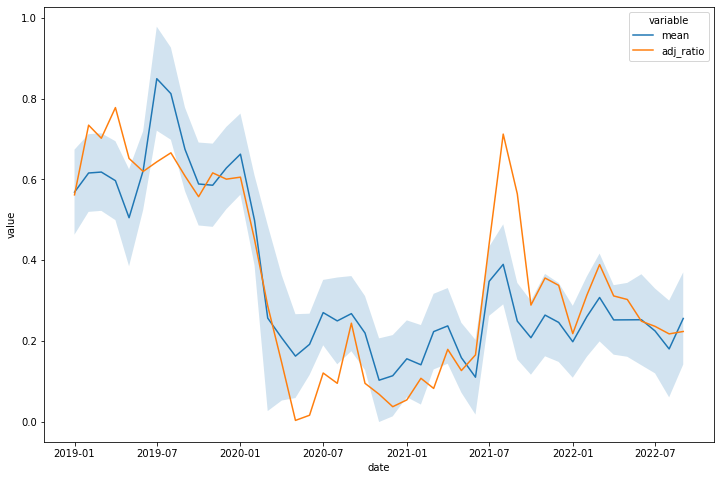

In [31]:
ratio_viz_df = ratio_stats[["mean", "adj_ratio", "date"]].melt(id_vars="date")

fig, ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=ratio_viz_df, x="date", y="value", hue="variable")
ax.fill_between(data=ratio_stats, x="date", y1="mean_ci_lower", y2="mean_ci_upper", alpha=0.2)
plt.show()